In [1]:
from IPython.display import Image
penguin = Image(r"C:\Users\20120\Downloads\unnamed.jpg")
penguin_details = Image(r"C:\Users\20120\Downloads\ChatGPT Image Sep 17, 2025, 07_16_52 AM.png", width=500)




<h2>About Dataset</h2>

<p>
Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network
</p>

<ul>
  <li><b>species:</b> A factor denoting penguin species (Adélie, Chinstrap and Gentoo)</li>
  <li><b>island:</b> A factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)</li>
  <li><b>bill_length_mm:</b> A number denoting bill length (millimeters)</li>
  <li><b>bill_depth_mm:</b> A number denoting bill depth (millimeters)</li>
  <li><b>flipper_length_mm:</b> An integer denoting flipper length (millimeters)</li>
  <li><b>body_mass_g:</b> An integer denoting body mass (grams)</li>
  <li><b>sex:</b> Penguins sex (Male, Female)</li>
  <li><b>year:</b> A number denoting the year data was collected</li>
</ul>




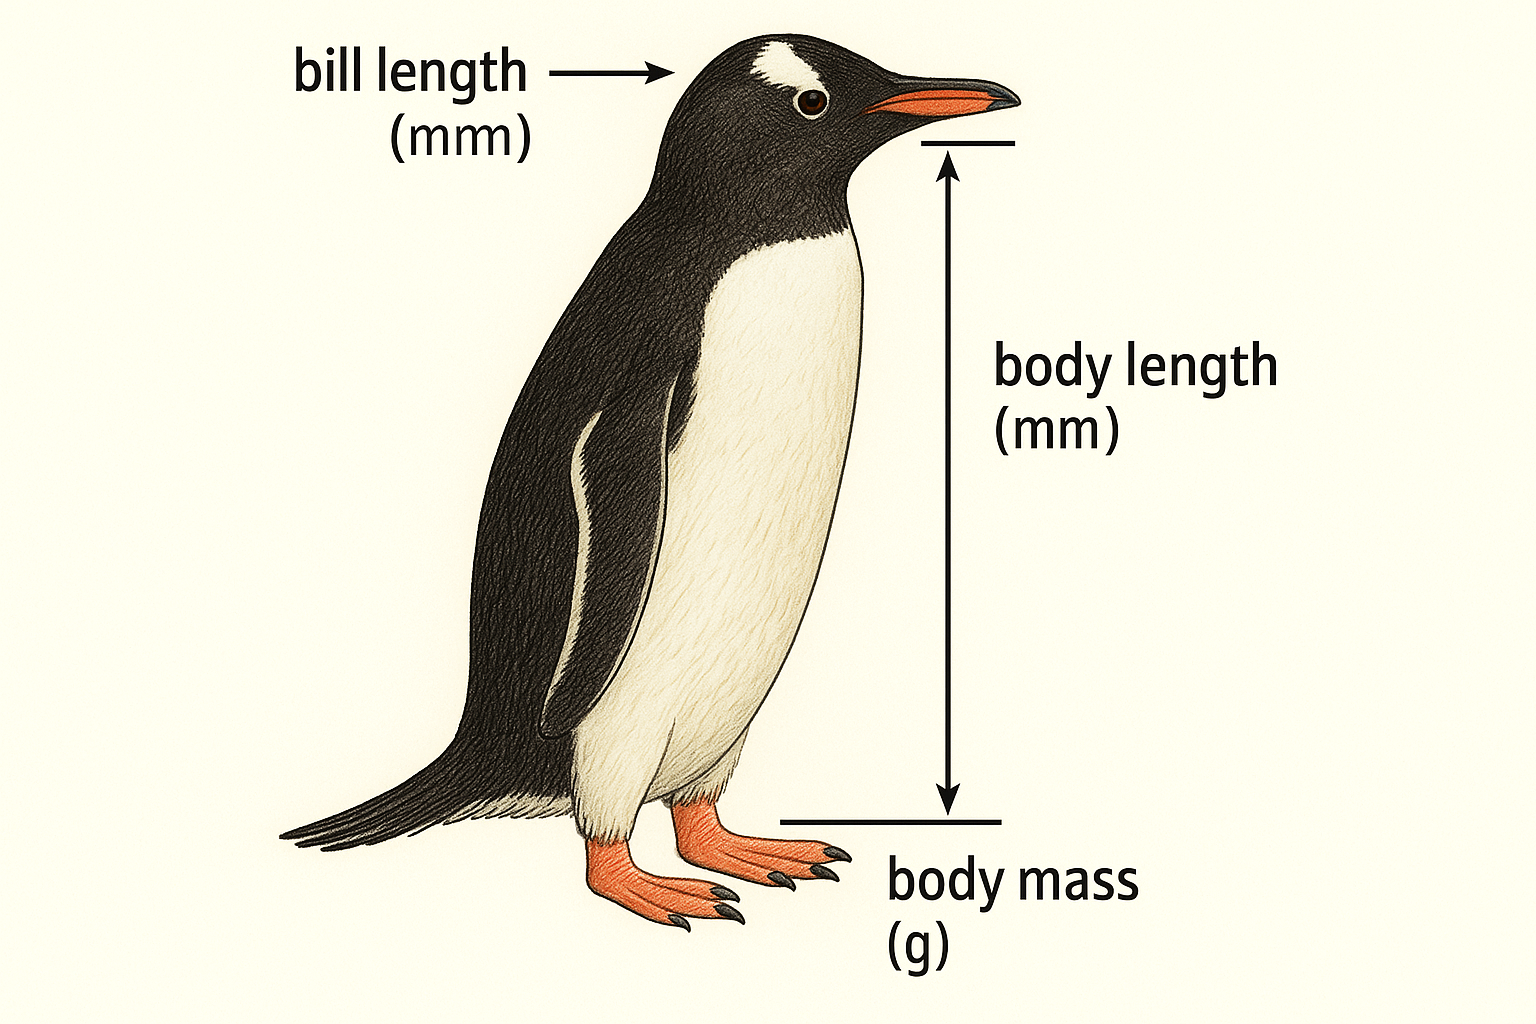

In [2]:
penguin_details

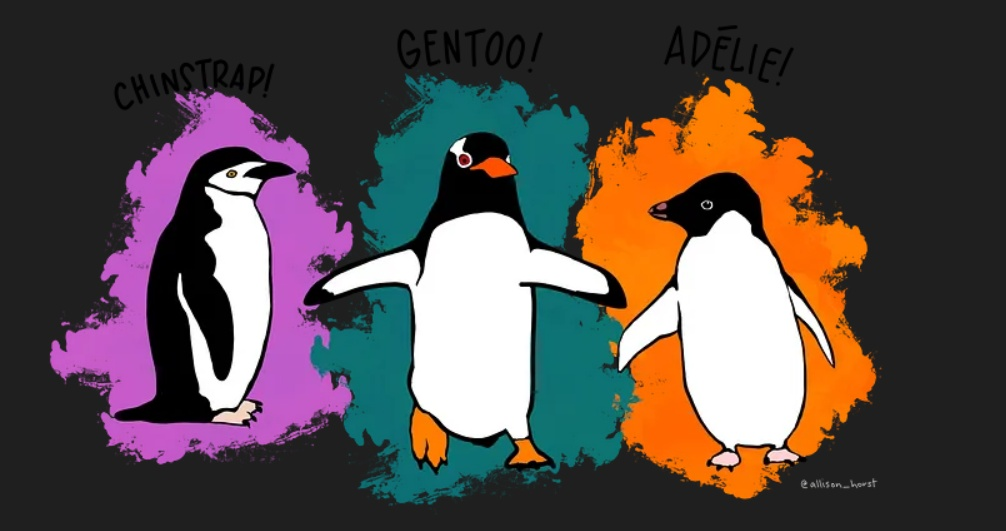

In [20]:
penguin

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\20120\Downloads\penguins_lter.csv")
df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

In [4]:
df.columns


Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [196]:
data_encoded=df.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data_encoded.select_dtypes(include='object').columns:
    data_encoded[col]=le.fit_transform(data_encoded[col])

In [162]:
data_encoded.drop(['studyName','Sample Number','Region','Individual ID', 'Comments','Stage','Date Egg' ], axis=1, inplace=True)

In [5]:
df.drop(['studyName','Sample Number','Region','Individual ID', 'Comments','Date Egg' ], axis=1, inplace=True)

### checking the Data Quailty 

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Stage                344 non-null    object 
 3   Clutch Completion    344 non-null    object 
 4   Culmen Length (mm)   342 non-null    float64
 5   Culmen Depth (mm)    342 non-null    float64
 6   Flipper Length (mm)  342 non-null    float64
 7   Body Mass (g)        342 non-null    float64
 8   Sex                  334 non-null    object 
 9   Delta 15 N (o/oo)    330 non-null    float64
 10  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(5)
memory usage: 29.7+ KB


In [199]:
df.isnull().sum()

Species                 0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [200]:
df.shape

(344, 11)

In [201]:
df.dropna(inplace=True)

In [168]:
df.isna().sum()

Species                0
Island                 0
Stage                  0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
dtype: int64

In [202]:
df.shape

(325, 11)

In [203]:
#checking for duplicates
df.duplicated().sum()


0

In [204]:
#checking range of numerical columns
df.select_dtypes(include='number').describe()

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count          325.000000         325.000000           325.000000   
mean            44.054769          17.123077           201.264615   
std              5.472226           1.965942            13.964598   
min             32.100000          13.100000           172.000000   
25%             39.500000          15.600000           190.000000   
50%             44.900000          17.300000           197.000000   
75%             48.700000          18.600000           213.000000   
max             59.600000          21.500000           231.000000   

       Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
count     325.000000         325.000000         325.000000  
mean     4216.000000           8.737794         -25.690217  
std       808.859222           0.552581           0.790098  
min      2700.000000           7.632200         -27.018540  
25%      3550.000000           8.302310         -26.326010  
50%      4050.000000           8.658030         -25.852030  
75%      4800.000000           9.180210         -25.060200  
max      6300.000000          10.025440         -23.890170

In [205]:
# checking categorical columns if there is inconsistency
for col in df.select_dtypes(include='object'):
    print(df[col].value_counts())
    print('---'*40)

Species
Adelie Penguin (Pygoscelis adeliae)          139
Gentoo penguin (Pygoscelis papua)            119
Chinstrap penguin (Pygoscelis antarctica)     67
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Island
Biscoe       163
Dream        119
Torgersen     43
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Stage
Adult, 1 Egg Stage    325
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Clutch Completion
Yes    291
No      34
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Sex
FEMALE    163
MALE      161
.           1
Name: count, dtype: int64
-------------------------------------------------------

In [206]:
df.drop('Stage', axis=1, inplace=True)

In [207]:
df['Species']=df['Species'].apply(lambda x: x.split()[0])
df['Species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [208]:
df[df['Sex']=='.']

Species  Island Clutch Completion  Culmen Length (mm)  Culmen Depth (mm)  \
336  Gentoo  Biscoe               Yes                44.5               15.7   

     Flipper Length (mm)  Body Mass (g) Sex  Delta 15 N (o/oo)  \
336                217.0         4875.0   .            8.04111   

     Delta 13 C (o/oo)  
336          -26.18444

In [209]:
df.drop(336,inplace=True)

In [210]:
df[df['Sex']=='.']

Empty DataFrame
Columns: [Species, Island, Clutch Completion, Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Sex, Delta 15 N (o/oo), Delta 13 C (o/oo)]
Index: []

### Exploratory Data Analysis on Penguin Data

#### 1- univarant 


In [211]:
df.columns


Index(['Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [7]:
cat_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(include='number')
len(cat_cols.columns)

5

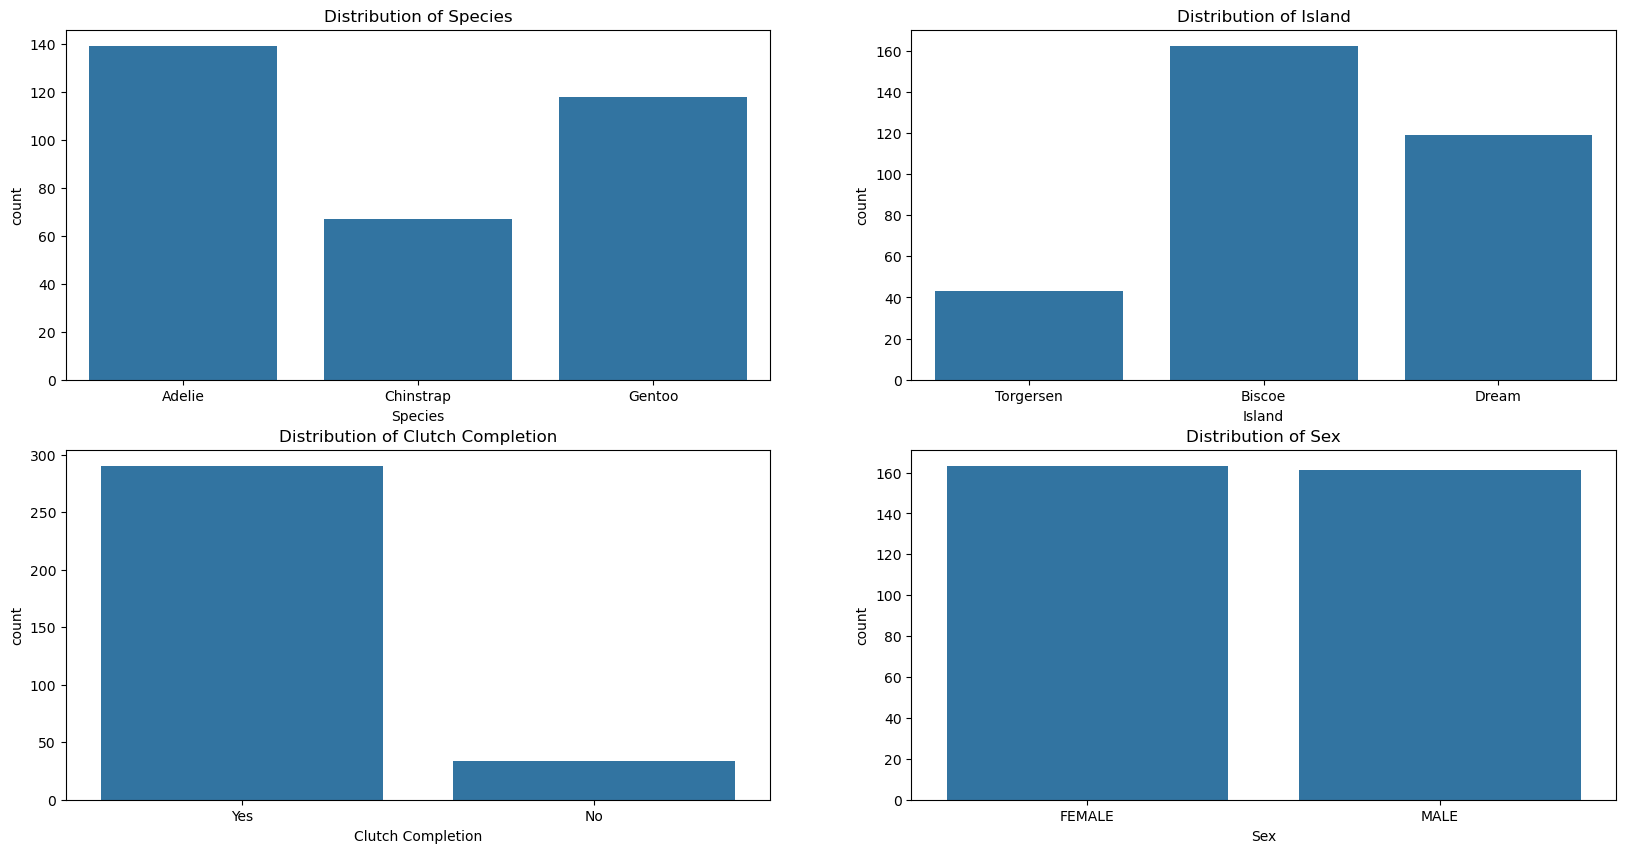

In [ ]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
plt.show()

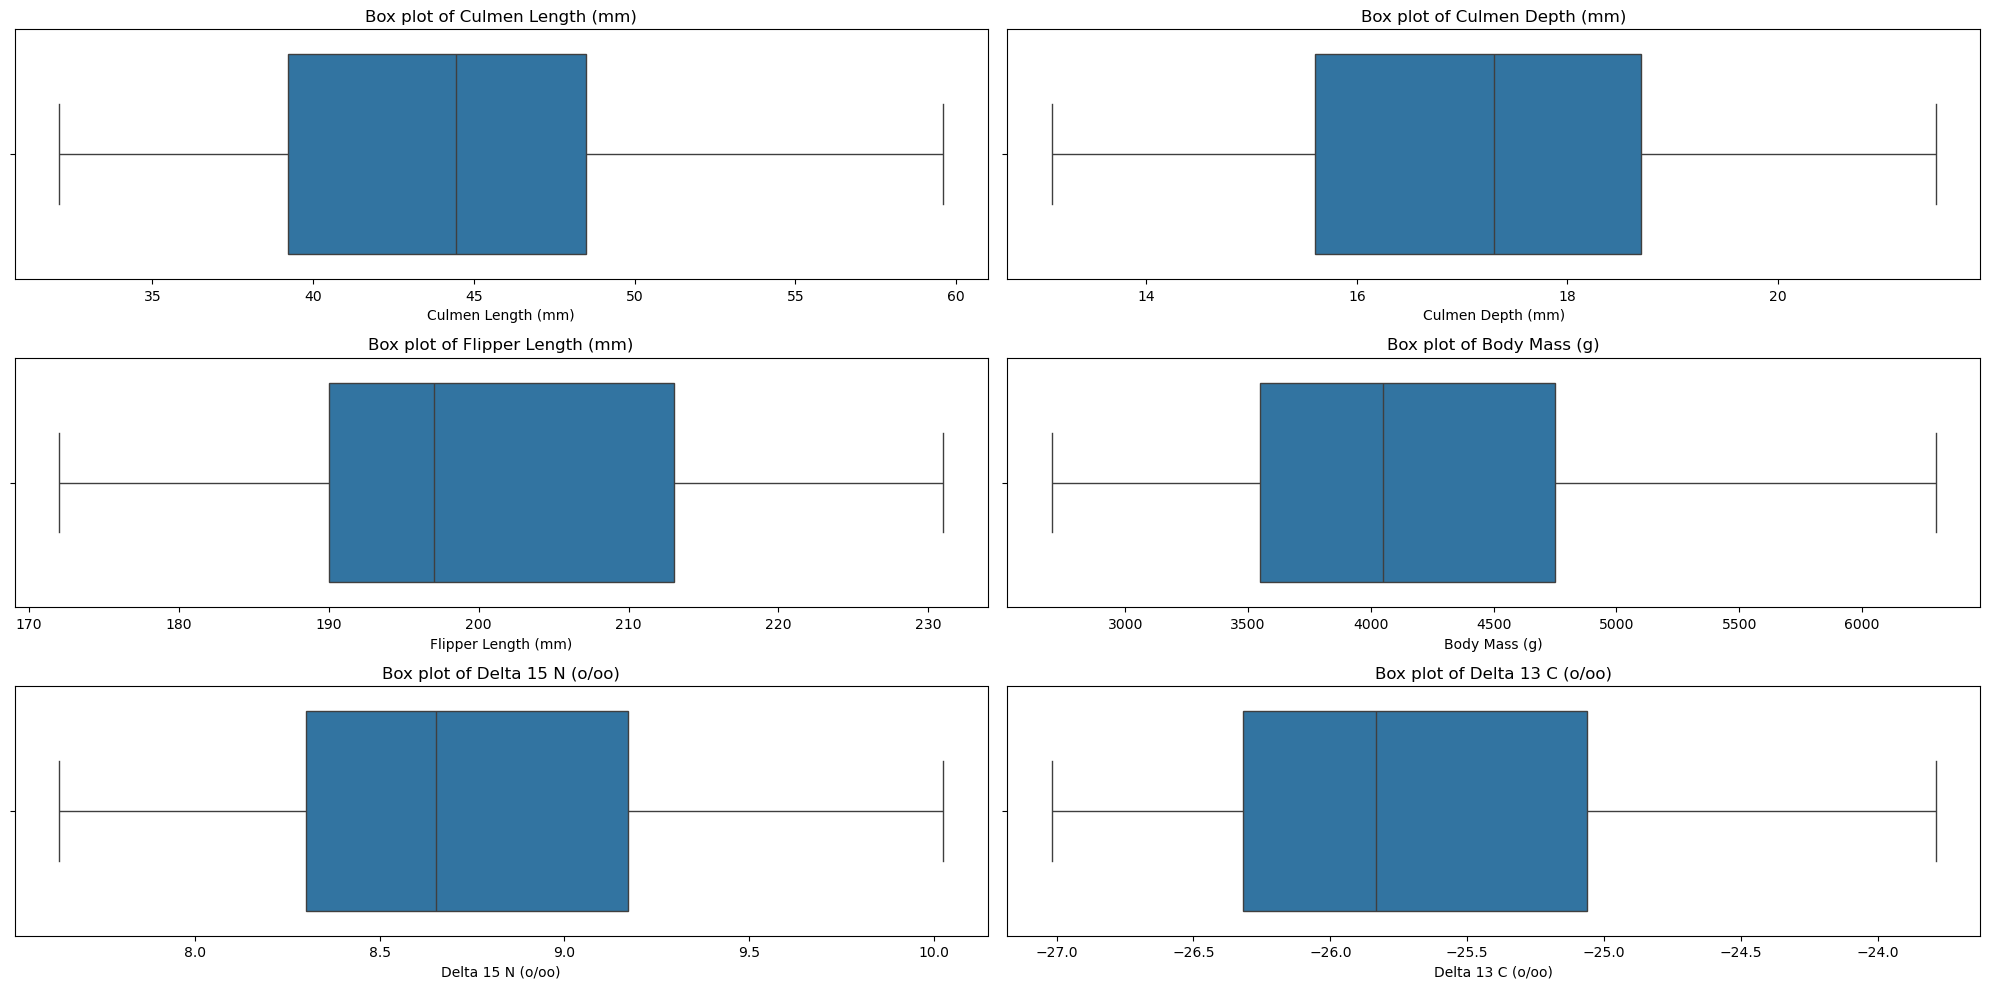

In [11]:
plt.figure(figsize=(20,10))
for i, col in enumerate(num_cols):
    plt.subplot(3,2,i+1)  # 3 rows, 2 columns grid
    sns.boxplot(data=df, x=col)
    plt.title(f'Box plot of {col}')
    plt.tight_layout()
plt.show()

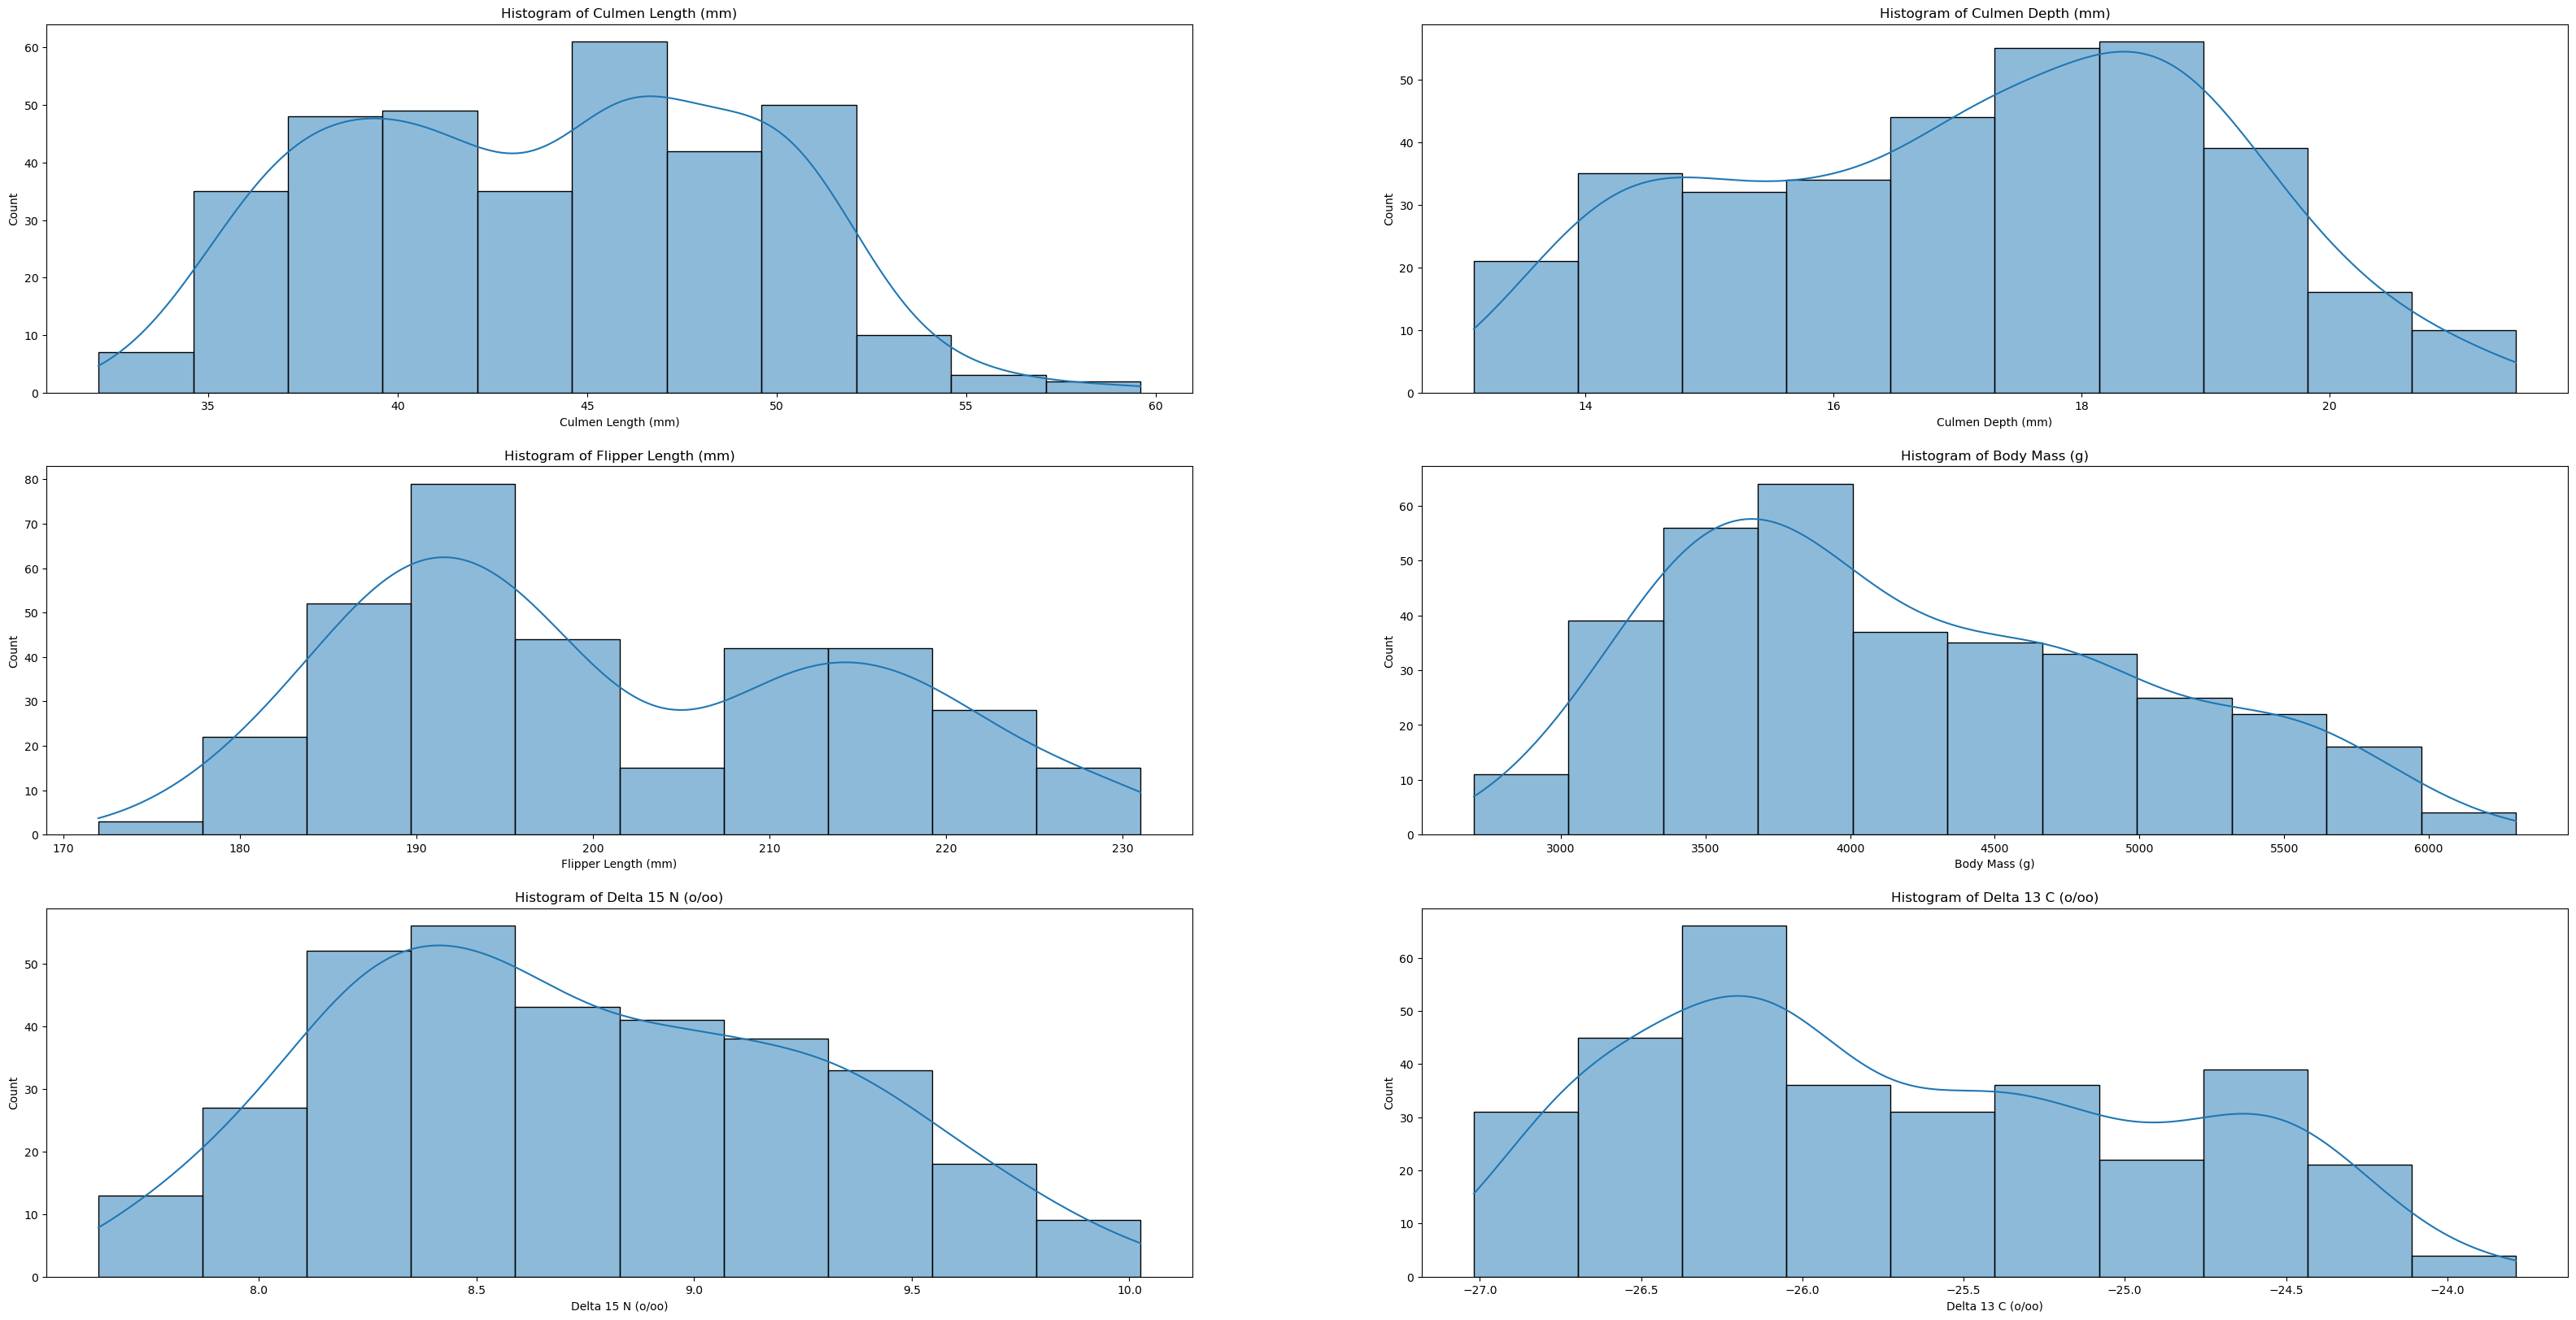

In [14]:
plt.figure(figsize=(40,20))
for i,col in enumerate(num_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
plt.show()


#### 2- Multivarant 


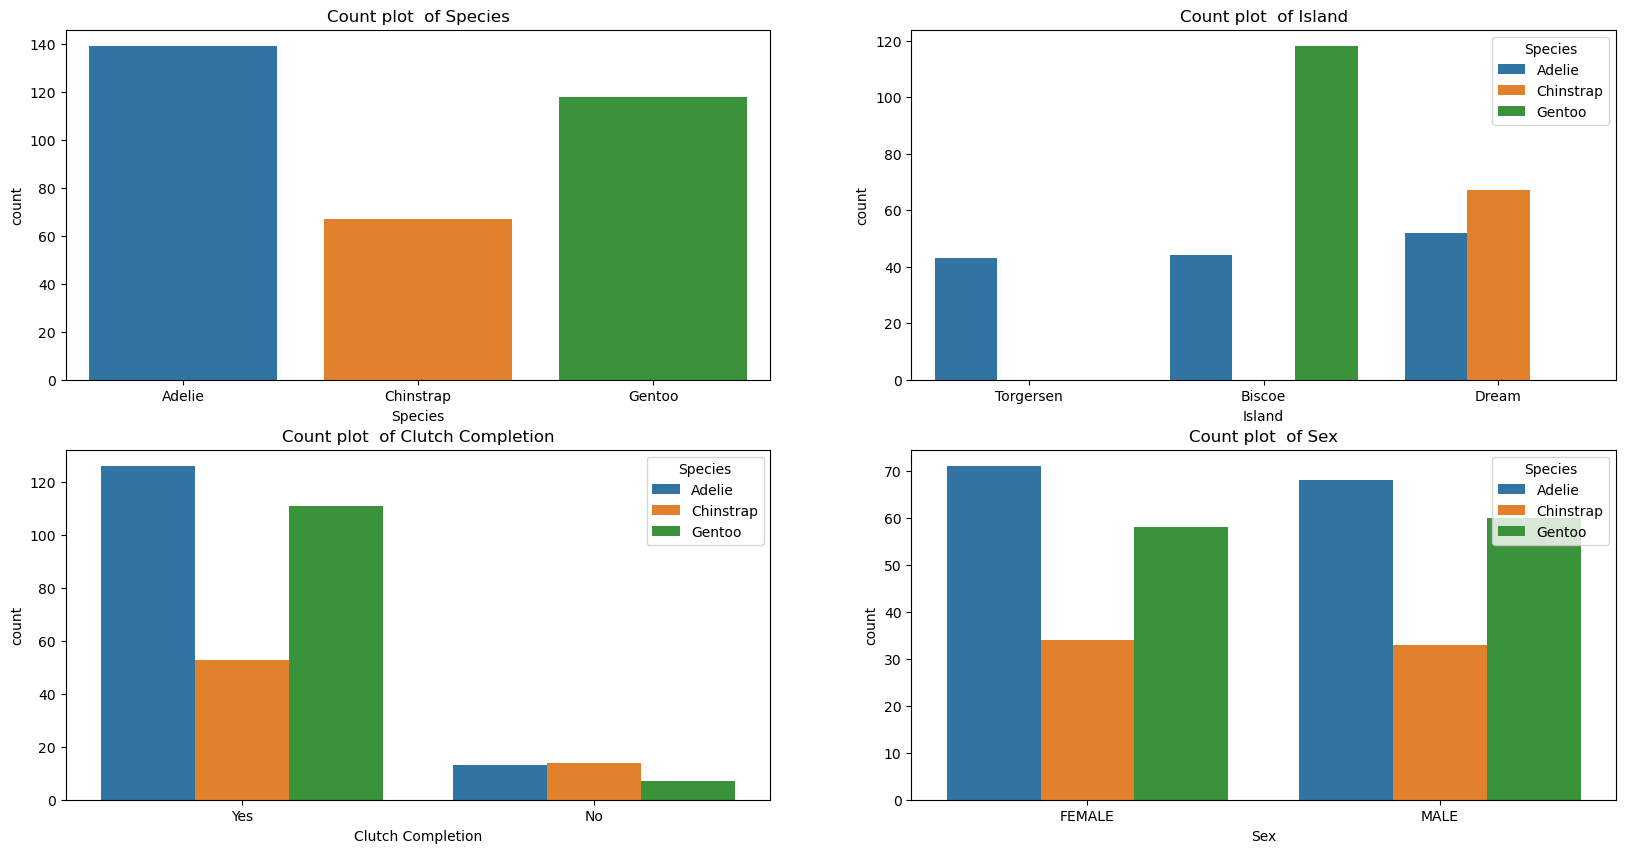

In [218]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df, x=col,hue='Species')
    plt.title(f'Count plot  of {col}')
plt.show()

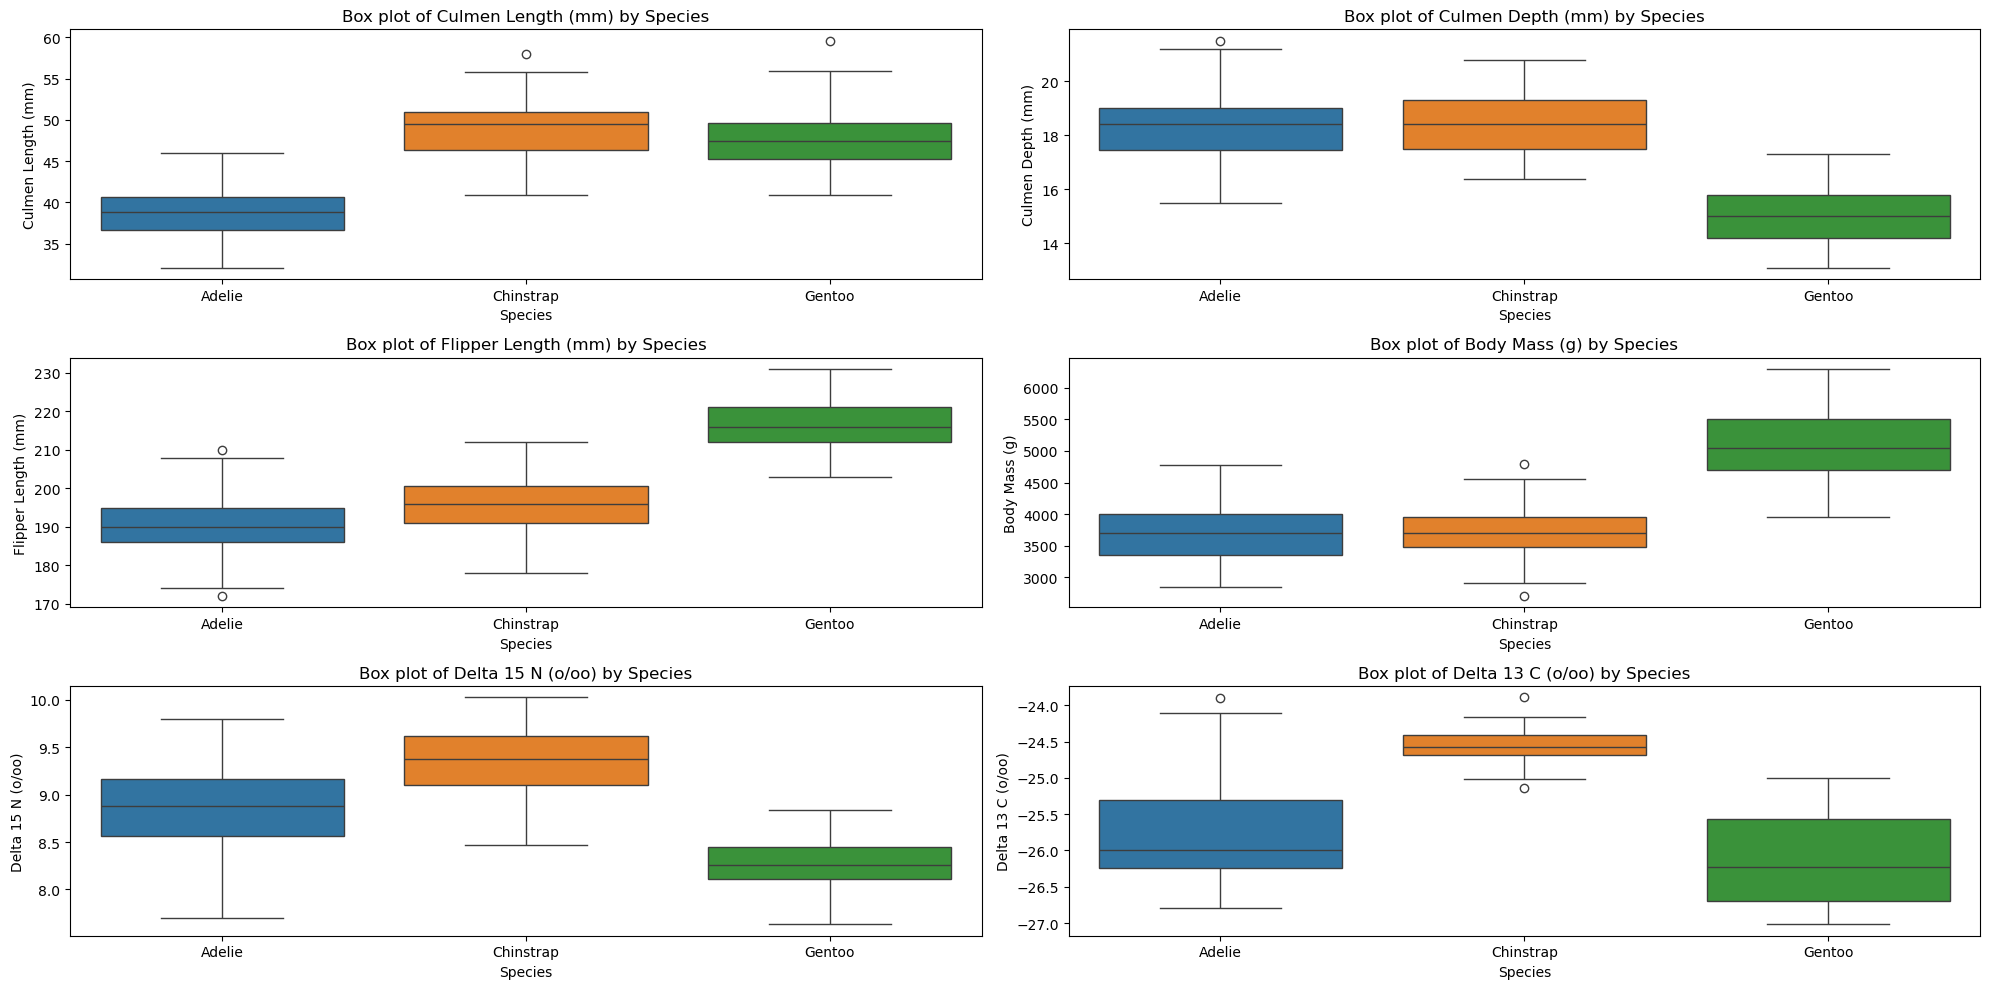

In [219]:
plt.figure(figsize=(20,10))
for i,col in enumerate(num_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, x='Species', y=col,hue='Species')
    plt.title(f'Box plot of {col} by Species')
    plt.tight_layout()
plt.show()

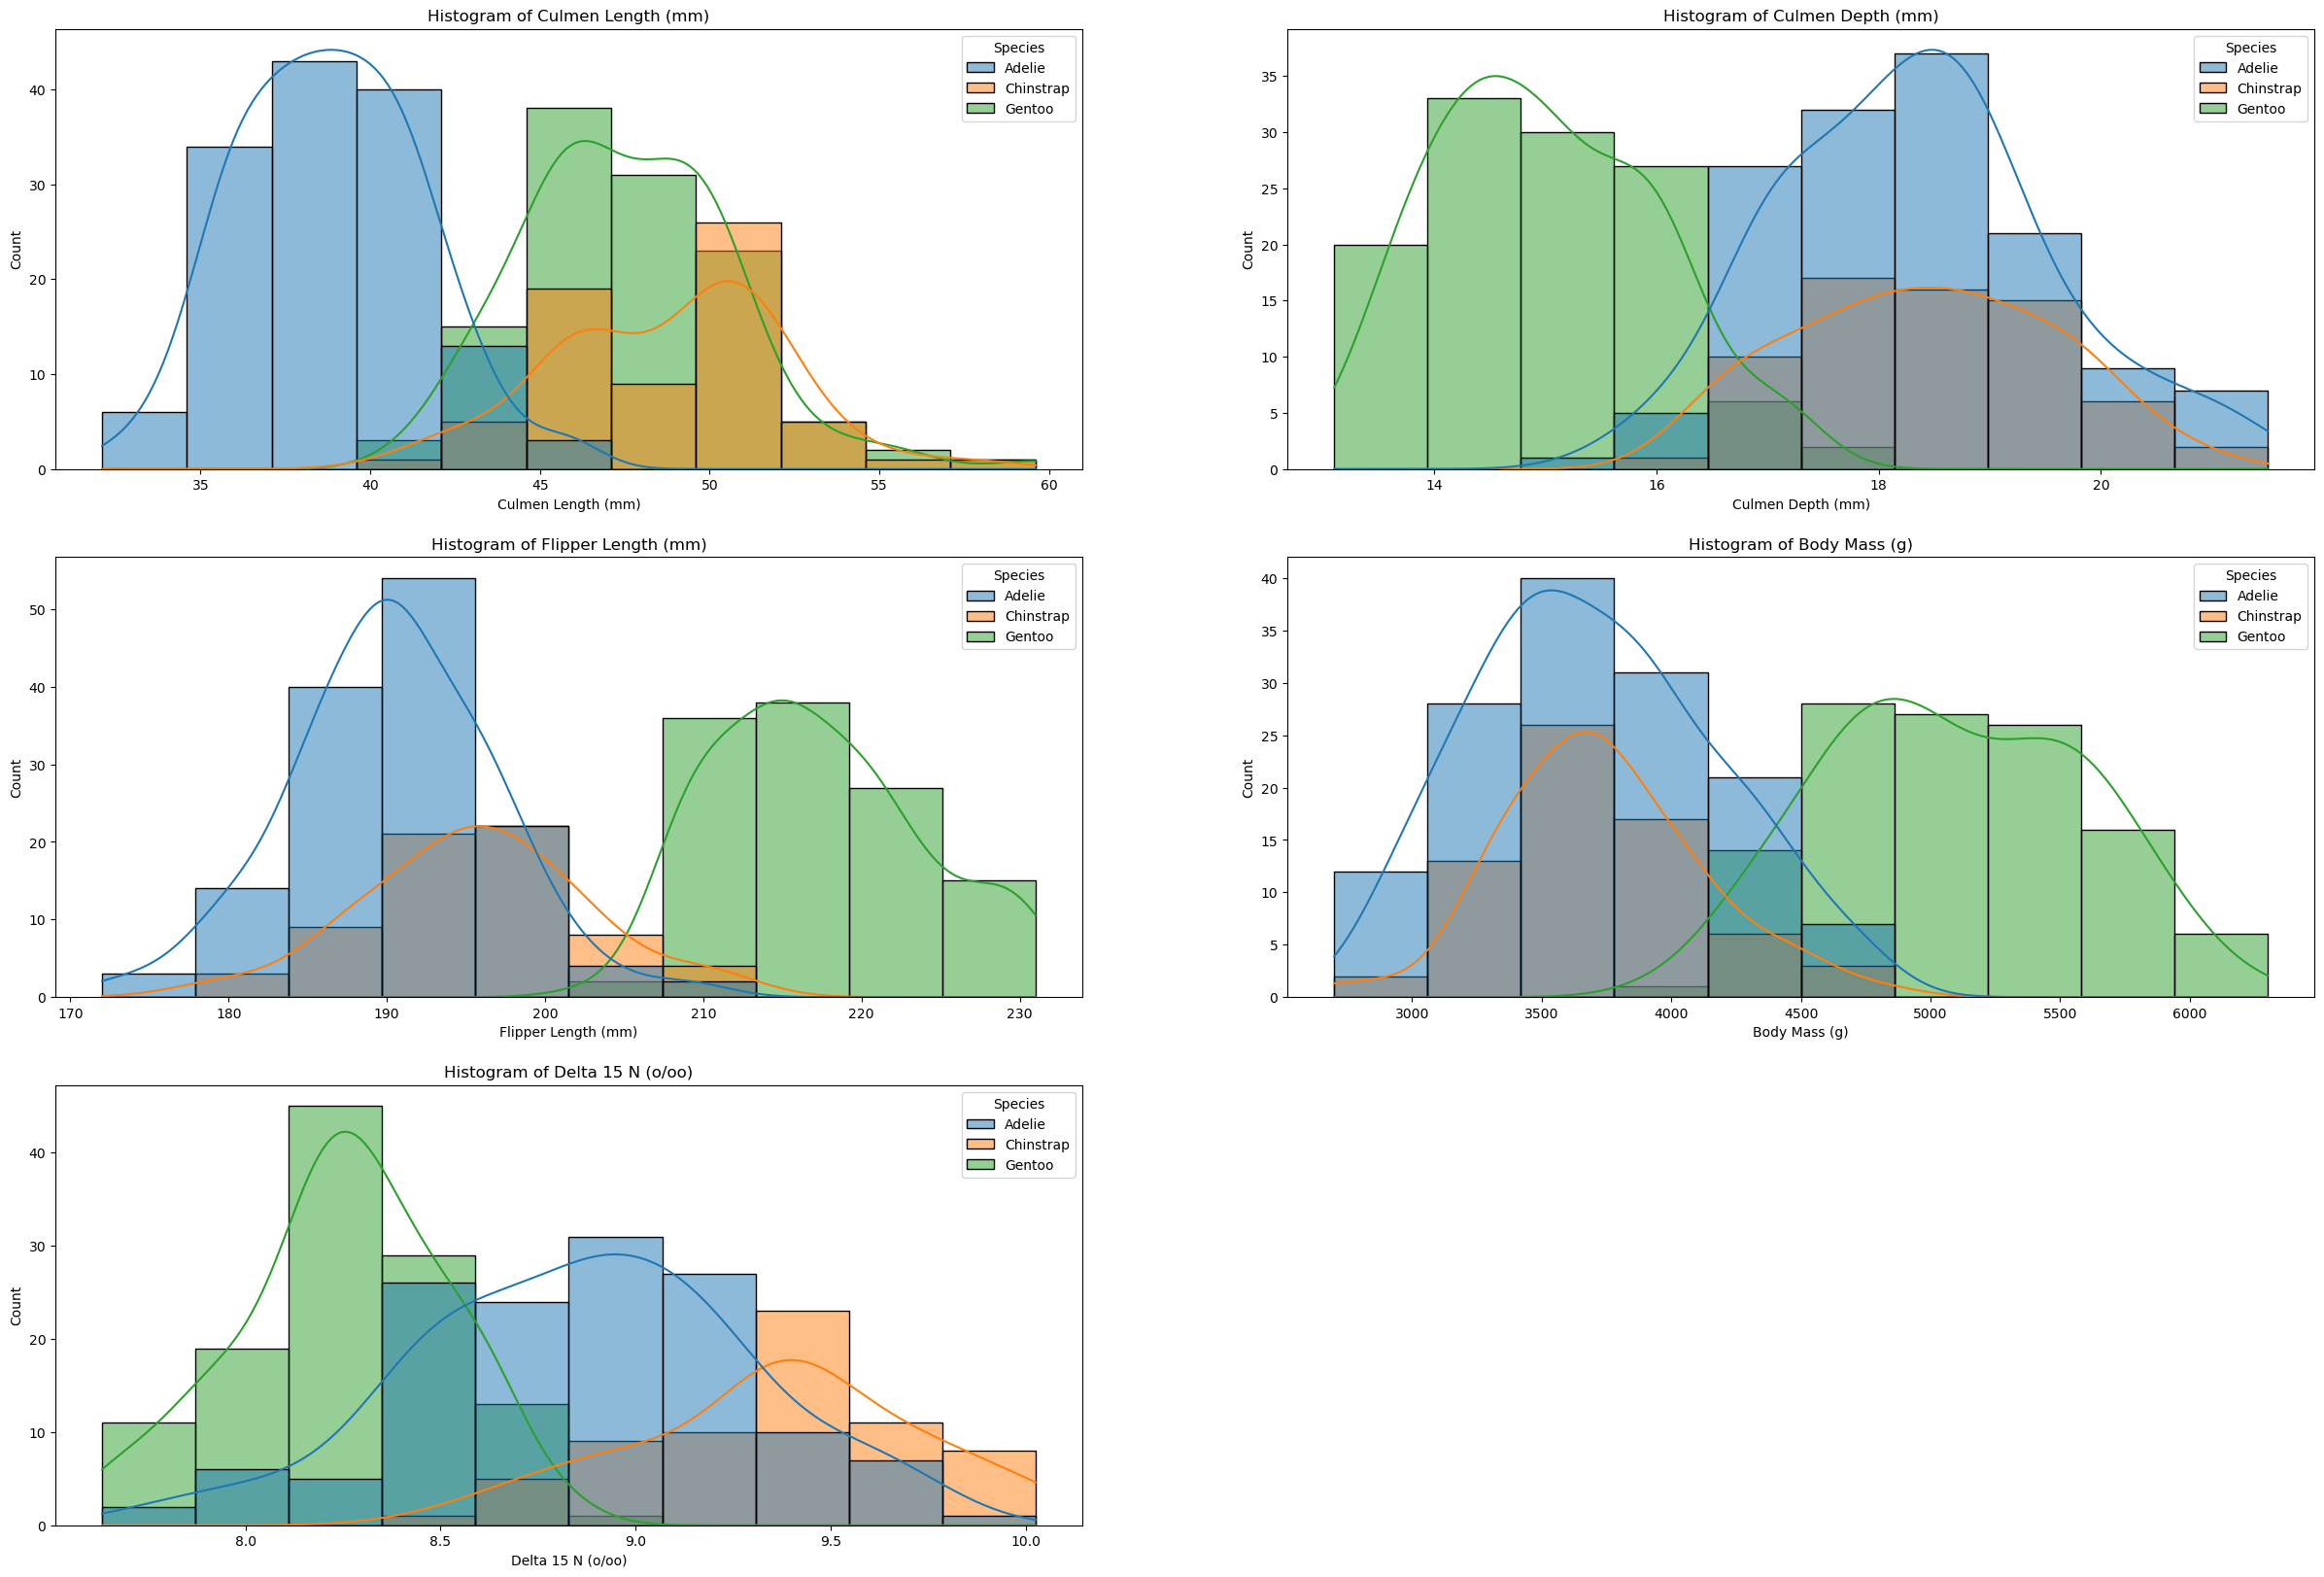

In [248]:
plt.figure(figsize=(30,20))
for i,col in enumerate(num_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df, x=col, kde=True,hue='Species')
    plt.title(f'Histogram of {col}')
plt.show()

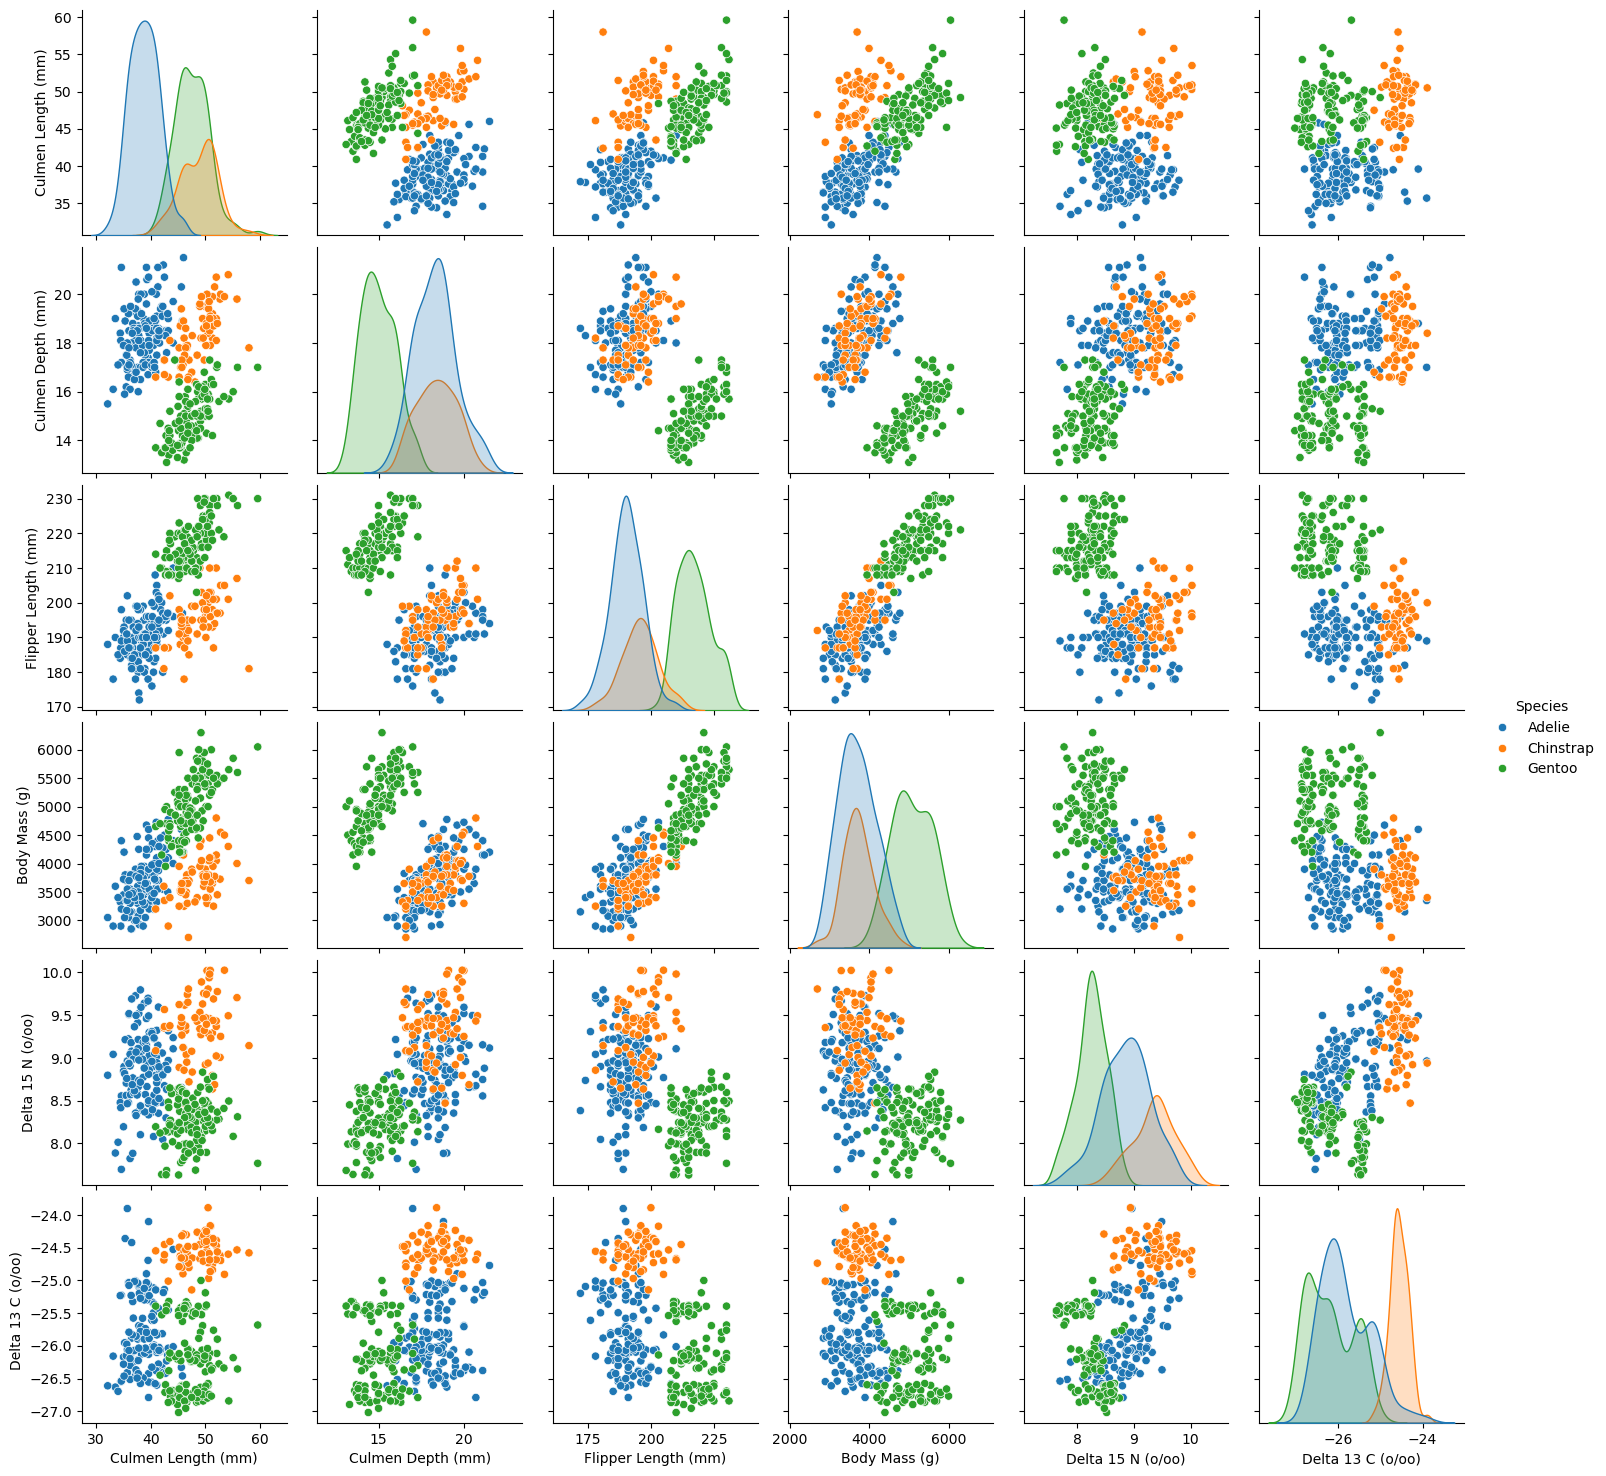

In [221]:
sns.pairplot(df, hue='Species')

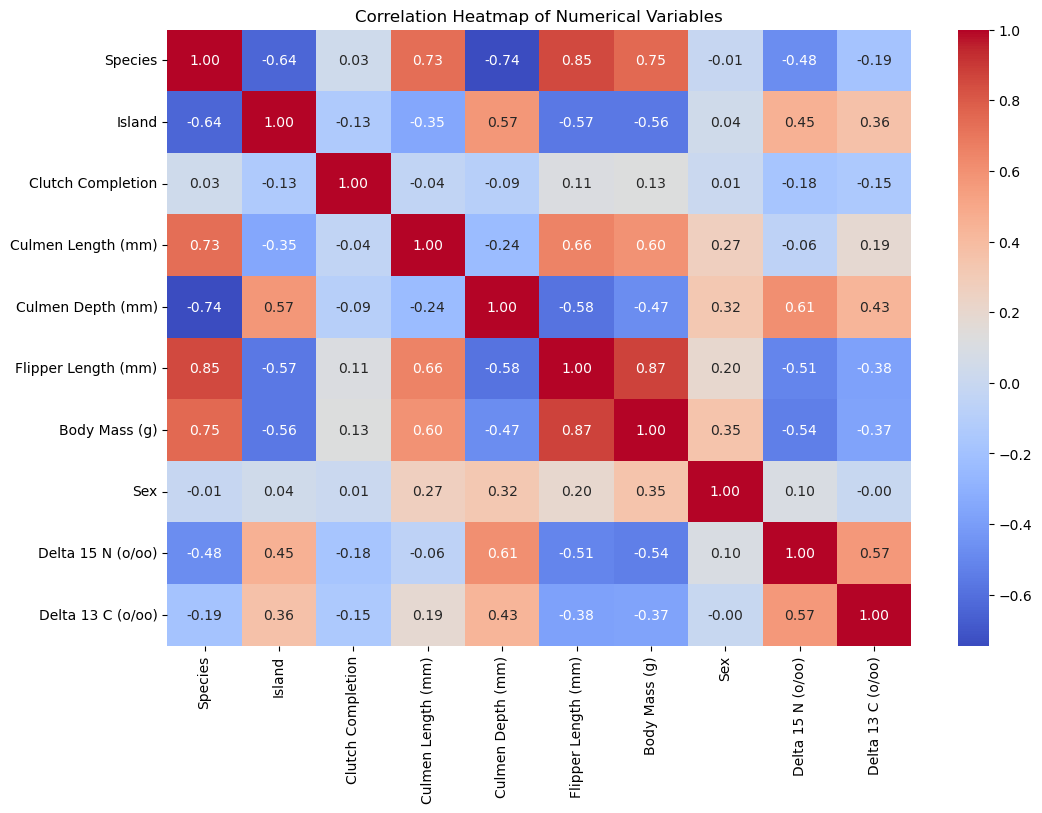

In [122]:
plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


In [222]:
df.drop(['Clutch Completion','Sex','Delta 13 C (o/oo)'],axis=1,inplace=True)

In [223]:
df.columns

Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)'],
      dtype='object')

## Data Preprocessing 

In [267]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [268]:
X=df.drop('Species',axis=1)
y=df['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,stratify=y,random_state=101)


In [269]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((259, 6), (65, 6), (259,), (65,))

In [270]:
cat_cols = X.select_dtypes(include='object')
num_cols = X.select_dtypes(include='number')
num_cols = list(num_cols)
cat_cols = list(cat_cols)


In [271]:
my_transformer = ColumnTransformer([
    ('num',StandardScaler(),num_cols)
    ,('Cat',OneHotEncoder(),cat_cols)])
X_train=my_transformer.fit_transform(X_train)
X_test=my_transformer.transform(X_test)


In [ ]:
# encode target labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


# Classification Models 
 

In [273]:
# importing models and metrics
from sklearn.linear_model import LogisticRegression     
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [296]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [297]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgb.XGBClassifier())
]


In [298]:
result = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    result.append([name, accuracy, precision, recall, f1])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [300]:
result_df = pd.DataFrame(result, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'f1_Score'])
display(result_df)

Model  Accuracy  Precision    Recall  f1_Score
0  Logistic Regression  1.000000   1.000000  1.000000  1.000000
1        Decision Tree  1.000000   1.000000  1.000000  1.000000
2        Random Forest  1.000000   1.000000  1.000000  1.000000
3          Naive Bayes  0.784615   0.854521  0.784615  0.770149
4  K-Nearest Neighbors  1.000000   1.000000  1.000000  1.000000
5             AdaBoost  0.800000   0.863415  0.800000  0.739556
6    Gradient Boosting  1.000000   1.000000  1.000000  1.000000
7              XGBoost  1.000000   1.000000  1.000000  1.000000

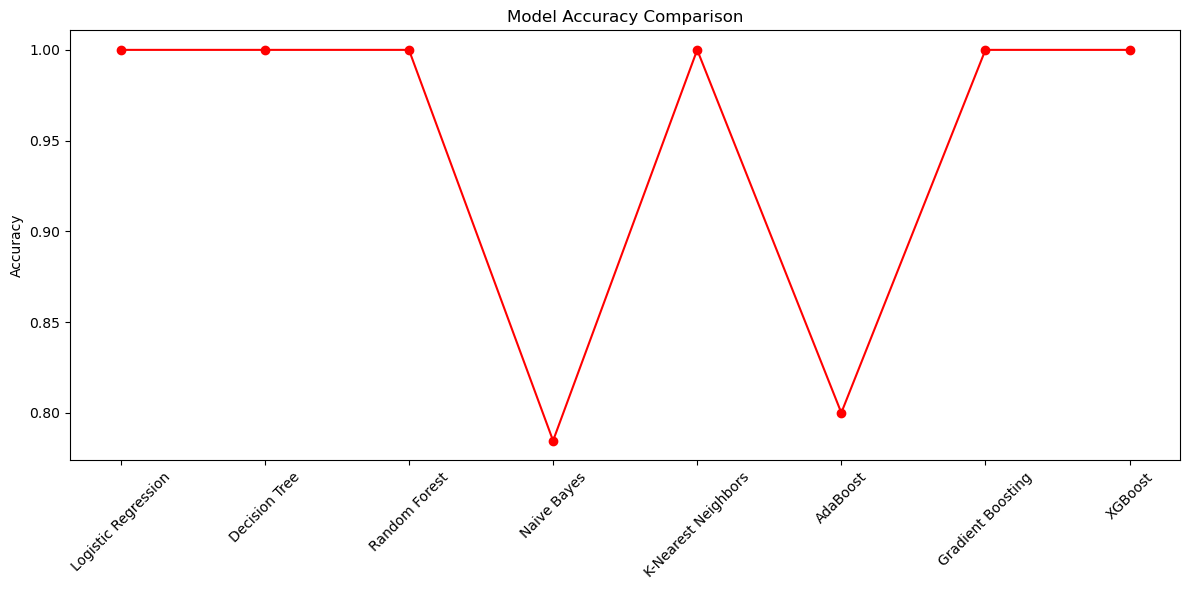

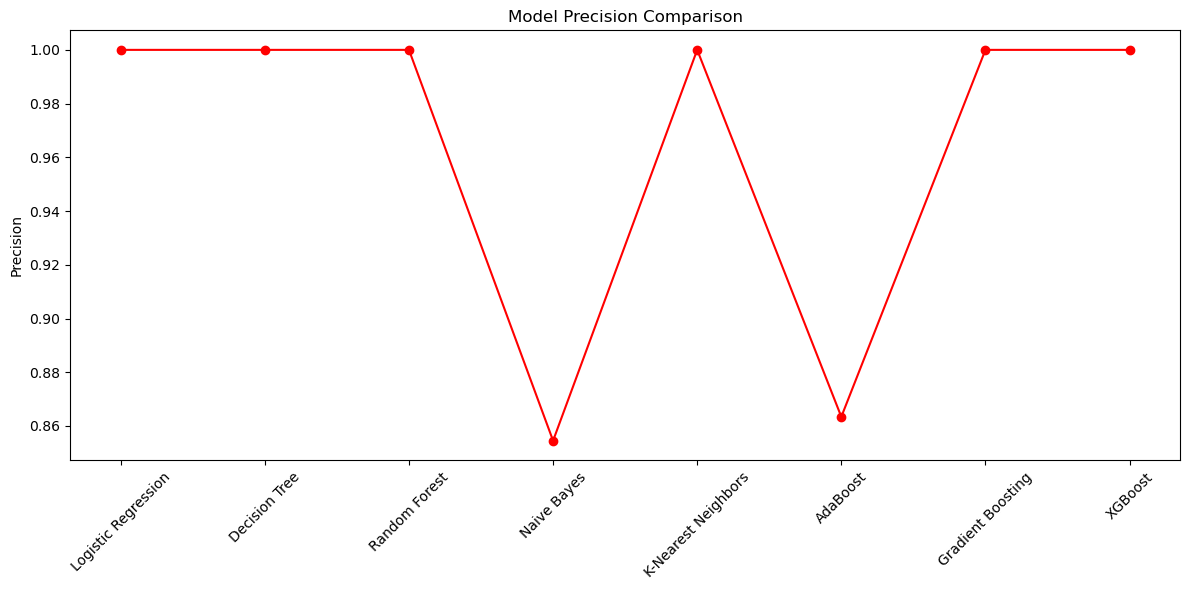

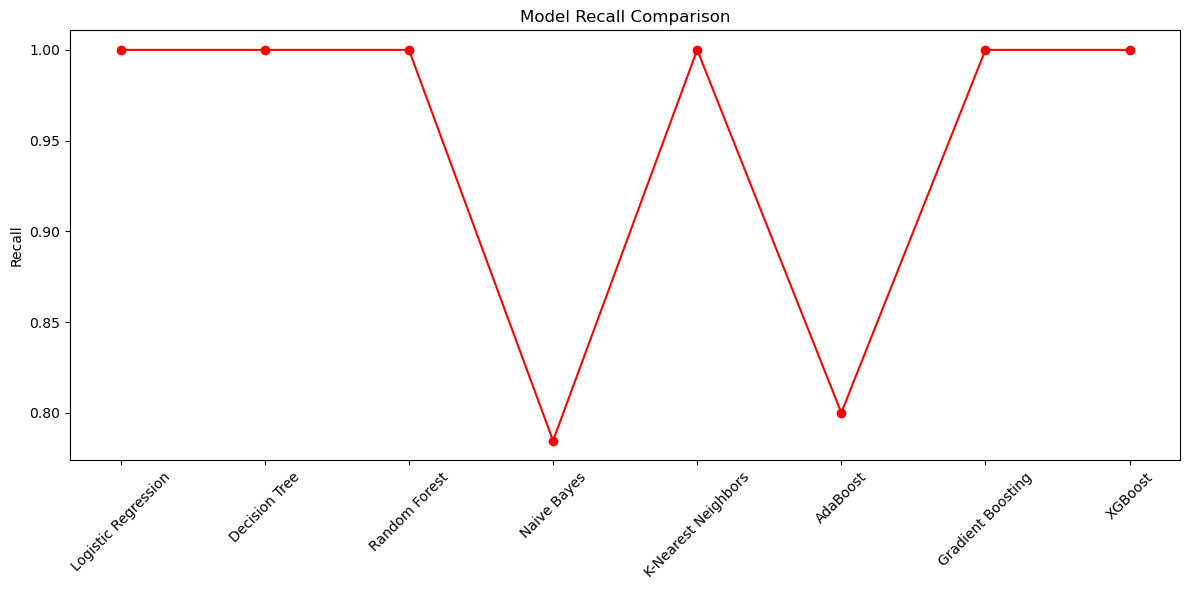

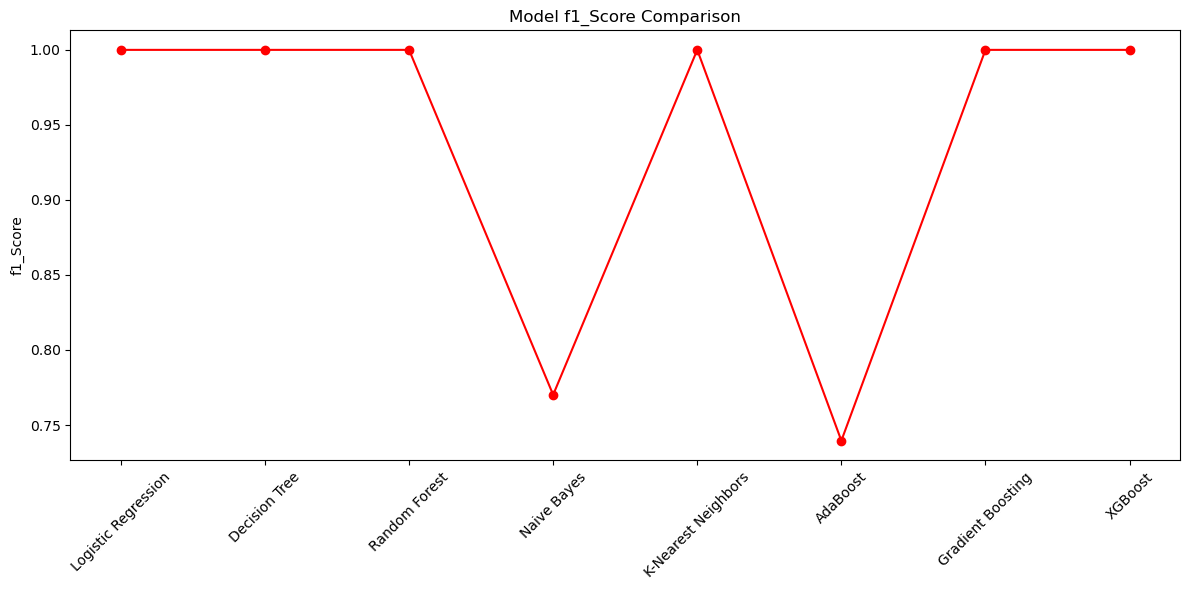

In [315]:
for col in result_df.columns[1:]:
    plt.figure(figsize=(12,6))
    plt.plot(result_df['Model'], result_df[col], marker='o',color='red')
    plt.xticks(rotation=45)
    plt.title(f'Model {col} Comparison')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


